<a href="https://colab.research.google.com/github/HaJunYoo/Audio_Speech_Processing_Study/blob/main/%08spectrogram_cnn_lstm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
cd /content/drive/MyDrive/졸플/Audio_study/

/content/drive/MyDrive/졸플/Audio_study


In [13]:
pwd

'/content/drive/MyDrive/졸플/Audio_study'

In [14]:
ls

'1.강제추행(성범죄)_17951.json'       ' sample-cnn-lstm.ipynb'
 Audio_classification_tutorial.ipynb  'Speaker Recognition.ipynb'
 Audio_Processing.ipynb                spectrogram/
 data/                                 spectrogram_fixed/
 json2csv.ipynb                        spectrograms/
' sample-cnn-lstm-2.ipynb'            ' spectrogram 저장.ipynb'


In [9]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 43.0 kB of archives.
After this operation, 115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tree amd64 1.8.0-1 [43.0 kB]
Fetched 43.0 kB in 1s (51.8 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 128208 files and directories currently install

In [15]:
!tree -d ./spectrograms

./spectrograms
├── exterior
├── help
├── interior
├── robbery
├── sexual
├── theft
└── violence

7 directories


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import librosa
import librosa.display
import torch
import torchaudio
import IPython.display as ipd


plt.style.use('seaborn-white')


In [ ]:
import numpy as np

audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)

print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


In [16]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from keras.utils import img_to_array, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [18]:
pwd

'/content/drive/MyDrive/졸플/Audio_study'

In [19]:
# Set the input shape
input_shape = (128, 128, 3)

# Define the number of classes
num_classes = 7

# Define the path to the directory containing the spectrogram images
data_dir = './spectrograms/'

# Define a list of the label names
label_names = ['exterior', 'help', 'interior', 'robbery', 'sexual', 'theft', 'violence']

# Create empty lists to store the image data and labels
data = []
labels = []

# Loop through the label names
for i, label in enumerate(label_names):
    # Get the path to the label directory
    path = os.path.join(data_dir, label)
    # Loop through the images in the label directory
    for img_file in os.listdir(path):
        # Load the image and convert it to an array
        img = load_img(os.path.join(path, img_file), target_size=input_shape[:2])
        img = img_to_array(img)
        # Append the image data and label to the lists
        data.append(img)
        labels.append(i)

# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize the data
data = data / 255.

# Convert the labels to categorical format
labels = to_categorical(labels, num_classes=num_classes)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2)


In [22]:
input_shape[:2]

(128, 128)

In [21]:
print(train_data.shape)
print(train_labels.shape)
print(val_data.shape)
print(val_labels.shape)

(3229, 128, 128, 3)
(3229, 7)
(808, 128, 128, 3)
(808, 7)


### 모델 1. 과적합이 제일 적으면서 정확도가 제일 무난하게 나오는 모델

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Reshape, Conv2D, MaxPooling2D, Flatten

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Add a max pooling layer with a 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer with 128 filters and a 3x3 kernel
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Add a reshape layer to convert the output of the convolutional layers to the input shape for the LSTM layer
model.add(Reshape((-1, 128)))

# Add an LSTM layer with 64 units
model.add(LSTM(64, return_sequences=True))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Flatten the layer to adapt fc layer
model.add(Flatten())

# Add a dense layer with 7 units and softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))

In [25]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 reshape (Reshape)           (None, 784, 128)          0

In [24]:
# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

이 구현은 마지막 Conv2D 계층에 대해 더 작은 커널 크기를 사용하여 출력 치수를 LSTM 입력에 대해 호환 가능한 모양으로 줄입니다. 마지막 Conv2D 레이어의 출력 형상은 (5, 21, 128)이며, LSTM 레이어에 대한 입력 형상과 동일한 개수의 단위를 갖는다. 그런 다음 reshape 레이어는 컨볼루션 레이어의 출력을 (5*21, 128)의 형상으로 평탄화하는데, 이는 LSTM 레이어에 대한 입력 형상이다.

In [28]:
# Train the model for 20 epochs with a batch size of 32
# epoch은 15번 정도가 적절해보임
history = model.fit(train_data, train_labels, batch_size=32, epochs=20, validation_data=(val_data, val_labels))


Epoch 1/20
101/101 [==============================] - 4s 41ms/step - loss: 0.1044 - accuracy: 0.9672 - val_loss: 0.5535 - val_accuracy: 0.8837
Epoch 2/20
101/101 [==============================] - 4s 41ms/step - loss: 0.1069 - accuracy: 0.9613 - val_loss: 0.4966 - val_accuracy: 0.8973
Epoch 3/20
101/101 [==============================] - 4s 42ms/step - loss: 0.0652 - accuracy: 0.9802 - val_loss: 0.5269 - val_accuracy: 0.9010
Epoch 4/20
101/101 [==============================] - 4s 41ms/step - loss: 0.0763 - accuracy: 0.9762 - val_loss: 0.6092 - val_accuracy: 0.8911
Epoch 5/20
101/101 [==============================] - 4s 40ms/step - loss: 0.0443 - accuracy: 0.9867 - val_loss: 0.6352 - val_accuracy: 0.8936
Epoch 6/20
101/101 [==============================] - 4s 41ms/step - loss: 0.0266 - accuracy: 0.9932 - val_loss: 0.6473 - val_accuracy: 0.8948
Epoch 7/20
101/101 [==============================] - 4s 40ms/step - loss: 0.0296 - accuracy: 0.9926 - val_loss: 0.6336 - val_accuracy: 0.8973

In [35]:
# Evaluate the model on the validation set
score = model.evaluate(val_data, val_labels, verbose=0 )

# Print the validation accuracy
print('Validation accuracy:', score[1])

Validation accuracy: 0.8910890817642212


In [33]:
import matplotlib.pyplot as plt

def plot_history(history_dict):
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(loss)+1)
  fig = plt.figure(figsize = (14, 5))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, loss, 'b--', label='train_loss')
  ax1.plot(epochs, val_loss, 'r:', label='val_loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']

  epochs = range(1, len(loss)+1)
  fig = plt.figure(figsize = (14, 5))

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, acc, 'b--', label='train_accuracy')
  ax2.plot(epochs, val_acc, 'r:', label='val_accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('acc')
  ax2.grid()
  ax2.legend()

  plt.show()

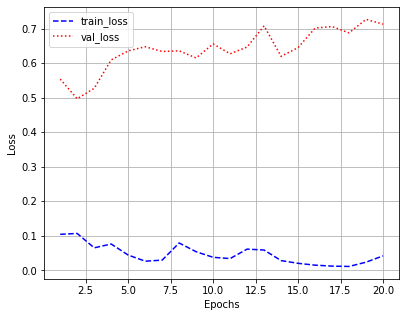

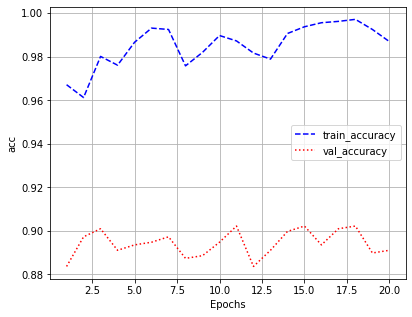

In [34]:
plot_history(history.history)

BatchNormalization와 Lstm 레이어를 늘리게 되면 train data set에 overfit 하는 현상이 발생


각 컨볼루션 레이어 다음에 배치 정규화 레이어를 추가하고 LSTM 유닛과 레이어의 수를 늘렸다. 또한 더 안정적인 훈련을 위해 Adam Optimizer에 학습률을 추가.

각 컨볼루션 레이어 후 배치 정규화를 사용하여 훈련 안정성을 높이고 잠재적으로 성능을 향상시키는 것을 고려하십시오.
더 많은 LSTM 계층을 추가하거나 LSTM 단위의 수를 늘려 입력에서 더 복잡한 시간 종속성을 캡처할 수 있습니다.
서로 다른 탈락률로 실험하여 과적합을 방지하기 위한 최적의 값을 찾습니다.
모델 일반화를 더욱 개선하기 위해 학습 속도 일정 또는 다른 형태의 정규화를 사용하는 것을 고려해 보십시오.

### 배치 정규화 

In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Reshape, Conv2D, MaxPooling2D, Flatten, BatchNormalization

model = Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
# Add a max pooling layer with a 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer with 128 filters and a 3x3 kernel
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Add a reshape layer to convert the output of the convolutional layers to the input shape for the LSTM layer
model.add(Reshape((-1, 256)))

# Add an LSTM layer with 64 units
model.add(LSTM(256, return_sequences=True))
# model.add(BatchNormalization()) <- 이 것도 문제

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

model.add(Flatten())
# model.add(Dense(128, activation='relu')) <- 이 것이 문제
# Add a dense layer with 10 units and softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization_12 (Bat  (None, 126, 126, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 batch_normalization_13 (Bat  (None, 61, 61, 64)       256       
 chNormalization)                                                
                                                      

In [45]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [47]:
# Train the model for 20 epochs with a batch size of 32
# 아래 모델은 정확도가 안 좋음
history2 = model.fit(train_data, train_labels, batch_size=32, epochs=20, validation_data=(val_data, val_labels))


Epoch 1/20
101/101 [==============================] - 13s 97ms/step - loss: 4.9739 - accuracy: 0.4899 - val_loss: 12.0964 - val_accuracy: 0.0829
Epoch 2/20
101/101 [==============================] - 9s 85ms/step - loss: 1.6799 - accuracy: 0.6714 - val_loss: 6.4551 - val_accuracy: 0.2215
Epoch 3/20
101/101 [==============================] - 9s 87ms/step - loss: 0.9130 - accuracy: 0.7687 - val_loss: 2.8325 - val_accuracy: 0.3329
Epoch 4/20
101/101 [==============================] - 9s 92ms/step - loss: 0.4912 - accuracy: 0.8455 - val_loss: 2.8219 - val_accuracy: 0.3032
Epoch 5/20
101/101 [==============================] - 9s 87ms/step - loss: 0.3699 - accuracy: 0.8851 - val_loss: 1.9673 - val_accuracy: 0.3960
Epoch 6/20
101/101 [==============================] - 9s 87ms/step - loss: 0.2847 - accuracy: 0.9068 - val_loss: 1.1354 - val_accuracy: 0.6795
Epoch 7/20
101/101 [==============================] - 9s 87ms/step - loss: 0.2783 - accuracy: 0.9170 - val_loss: 0.8091 - val_accuracy: 0.78

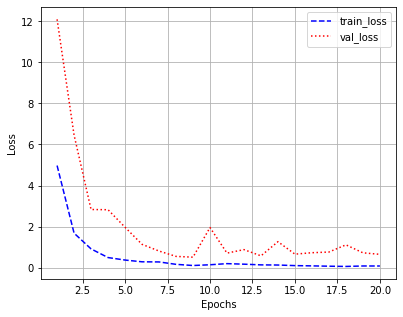

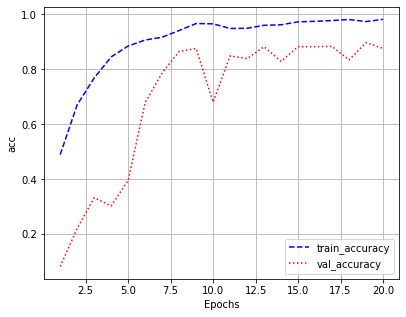

In [48]:
plot_history(history2.history)

모델이 훈련 데이터에 과적합되어 훈련 정확도와 검증 정확도 사이에 큰 차이가 발생할 수 있다. 배치 정규화를 추가하는 것은 과적합을 방지하기 위한 좋은 단계이지만 더 많은 드롭아웃을 사용하거나 모델의 복잡성을 줄이는 것과 같은 다른 기술도 시도할 수 있습니다.

train 정확도와 valid 정확도 사이의 큰 차이에 대한 또 다른 가능한 이유는 데이터 불균형 문제이다. 유효성 검사 세트의 클래스 분포가 교육 세트와 다른 경우 모델이 유효성 검사 세트에서 제대로 수행되지 않을 수 있습니다. 이 문제를 해결하기 위해 열차 테스트 분할 중에 데이터를 계층화하거나 소수 클래스를 오버샘플링할 수 있습니다.

### dropout

In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Reshape, Conv2D, MaxPooling2D, Flatten

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Add a max pooling layer with a 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters and a 3x3 kernel
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Add a reshape layer to convert the output of the convolutional layers to the input shape for the LSTM layer
model.add(Reshape((-1, 128)))

# Add an LSTM layer with 64 units
model.add(LSTM(64, return_sequences=True))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Flatten the layer to adapt fc layer
model.add(Flatten())

# Add a dense layer with 7 units and softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 128)      

In [52]:
# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for 10 epochs with a batch size of 32
history3 = model.fit(train_data, train_labels, batch_size=32, epochs=20, validation_data=(val_data, val_labels))


Epoch 1/20
101/101 [==============================] - 8s 53ms/step - loss: 1.3084 - accuracy: 0.4512 - val_loss: 1.1556 - val_accuracy: 0.5087
Epoch 2/20
101/101 [==============================] - 5s 45ms/step - loss: 1.0180 - accuracy: 0.5921 - val_loss: 0.9840 - val_accuracy: 0.6139
Epoch 3/20
101/101 [==============================] - 5s 46ms/step - loss: 0.8694 - accuracy: 0.6553 - val_loss: 0.9123 - val_accuracy: 0.6559
Epoch 4/20
101/101 [==============================] - 5s 45ms/step - loss: 0.7150 - accuracy: 0.7256 - val_loss: 0.7005 - val_accuracy: 0.7339
Epoch 5/20
101/101 [==============================] - 5s 45ms/step - loss: 0.6125 - accuracy: 0.7653 - val_loss: 0.6319 - val_accuracy: 0.7748
Epoch 6/20
101/101 [==============================] - 5s 46ms/step - loss: 0.4760 - accuracy: 0.8191 - val_loss: 0.5547 - val_accuracy: 0.7884
Epoch 7/20
101/101 [==============================] - 5s 46ms/step - loss: 0.4166 - accuracy: 0.8436 - val_loss: 0.5451 - val_accuracy: 0.8094

In [53]:
# Evaluate the model on the validation set
score = model.evaluate(val_data, val_labels, verbose=0)

# Print the validation accuracy
print('Validation accuracy:', score[1])

Validation accuracy: 0.8972772359848022


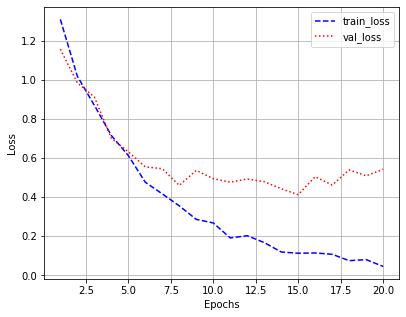

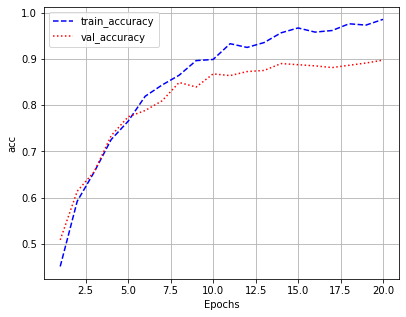

In [54]:
plot_history(history3.history)

### save the model

In [58]:
pwd

'/content/drive/MyDrive/졸플/Audio_study'

In [59]:
model.save('./2023-02-27_model.h5')

### 테스트 

In [55]:
pwd

'/content/drive/MyDrive/졸플/Audio_study'

In [71]:
import librosa
import numpy as np
from scipy import resize
from keras.models import load_model

# Load the trained model
# model = load_model('path/to/trained/model.h5')
model = load_model('./2023-02-27_model.h5')

# Load an example audio file
audio_file = './test/유투브-도와주세요.wav'

# Set the sampling rate and duration for the audio file
sr = 44100
duration = 5

# Load the audio data and resample it to the desired sampling rate
audio_data, _ = librosa.load(audio_file, sr=sr, duration=duration)

# Calculate the spectrogram of the audio data
spec = librosa.feature.melspectrogram(audio_data, sr=sr)

# Convert the spectrogram to decibels
spec_db = librosa.power_to_db(spec, ref=np.max)

# Resize the spectrogram to match the input shape of the model
spec_resized = np.resize(spec_db, (128, 128, 3))

# Reshape the spectrogram to match the model's input shape
spectrogram = spec_resized.reshape((1,) + spec_resized.shape)

# Normalize the spectrogram
spectrogram /= np.max(spectrogram)

# Normalize the spectrogram
spec_db /= np.max(spec_db)






<ipython-input-71-dee542976f1c>:33: RuntimeWarning: divide by zero encountered in true_divide
  spectrogram /= np.max(spectrogram)
<ipython-input-71-dee542976f1c>:33: RuntimeWarning: invalid value encountered in true_divide
  spectrogram /= np.max(spectrogram)
<ipython-input-71-dee542976f1c>:36: RuntimeWarning: divide by zero encountered in true_divide
  spec_db /= np.max(spec_db)
<ipython-input-71-dee542976f1c>:36: RuntimeWarning: invalid value encountered in true_divide
  spec_db /= np.max(spec_db)


In [72]:
spectrogram.shape

(1, 128, 128, 3)

In [74]:
# Predict the probabilities for each class
probabilities = model.predict(spectrogram)

# Get the index of the class with the highest probability
predicted_class = np.argmax(probabilities)

label_names = ['exterior', 'help', 'interior', 'robbery', 'sexual', 'theft', 'violence']

print(f"The predicted class for the audio file is {label_names[predicted_class]}.")

1/1 [==============================] - 0s 26ms/step
The predicted class for the audio file is help.
